# Deep Learning Book

## Libraries

In [1]:
#from sklearn.datasets import load_boston -> depricated in 1.3

# importing the Boston housing dataset from GitHub Gist
# The dataset can be found at: https://gist.github.com/nnbphuong/def91b5553736764e8e08f6255390f37
import pandas as pd
import numpy as np
boston = pd.read_csv("BostonHousing.csv")

# Importing necessary libraries
from sklearn.preprocessing import scale, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, SGDRegressor
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
# show the first 5 rows of the dataset  
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


### Chapter 6: Laying Linear Regression Foundations

In [3]:
# scale the features and separate the target variable
X, y= scale(boston.drop("MEDV", axis=1)), boston["MEDV"]

In [4]:
# features array
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
        -1.0755623 , -0.44615259],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
        -0.49243937, -0.44615259],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
        -1.2087274 ,  2.24138563],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.98304761, -0.44615259],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.86530163, -0.44615259],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.66905833, -0.44615259]])

In [5]:
# target variable array
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [6]:
# train the linear regression model
regression = LinearRegression()
regression.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
print('R2 %0.3f' % regression.score(X, y))

R2 0.842


In [8]:
print([a + ':' + str(round(b, 1)) for a, b in zip(boston.columns[:-1], regression.coef_)])

['CRIM:-1.1', 'ZN:-0.1', 'INDUS:0.8', 'CHAS:0.6', 'NOX:-1.8', 'RM:0.7', 'AGE:-0.2', 'DIS:-1.5', 'RAD:1.8', 'TAX:-1.6', 'PTRATIO:-1.2', 'LSTAT:-3.4', 'MEDV:4.4']


In [9]:
# Label Encoding vs One Hot Encoding for categorical variables
lbl = LabelEncoder()
enc = OneHotEncoder()
qualititative = ['red', 'red', 'green', 'blue', 'red', 'blue', 'blue', 'green']
labels = lbl.fit_transform(qualititative).reshape(8, 1)
print("Label Encoding: \n" , labels)
print("One Hot Encoding: \n", enc.fit_transform(labels).toarray())

Label Encoding: 
 [[2]
 [2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]]
One Hot Encoding: 
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [10]:
# using Polynomial Features
pf = PolynomialFeatures(degree = 2)
poly_X = pf.fit_transform(X)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.33, random_state = 42)
# training the model with polynomial features
reg_regression = Ridge(alpha=0.1)
reg_regression.fit(X_train, y_train)
print('R2: %0.3f' % r2_score(y_test, reg_regression.predict(X_test)))

R2: 0.902


In [11]:
# classification example with binary response
a = np.array([0, 0, 0, 0, 1, 1, 1, 1])
b = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(8, 1)
regression = LinearRegression()
regression.fit(b, a)
print(regression.predict(b) > 0.5)

[False False False False  True  True  True  True]


In [12]:
# using logistic regression for binary classification
binary_y = np.array(y >= 40).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, binary_y, test_size = 0.33, random_state = 42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print('In-sample accuracy: %0.3f' % accuracy_score(y_train, logistic.predict(X_train)))
print('Out-of-sample accuracy: %0.3f' % accuracy_score(y_test, logistic.predict(X_test)))

In-sample accuracy: 0.976
Out-of-sample accuracy: 0.982


In [13]:
# coefficients of the logistic regression model
for idx, coef in enumerate(logistic.coef_[0]):
    print(f"%7s : %7.3f" % (boston.columns[idx], coef))

   CRIM :   0.209
     ZN :  -0.062
  INDUS :   1.034
   CHAS :   0.131
    NOX :   0.196
     RM :   1.103
    AGE :  -0.528
    DIS :  -0.584
    RAD :   0.626
    TAX :   0.271
PTRATIO :  -0.383
  LSTAT :  -1.466
   MEDV :   2.027


In [14]:
print('\nclasses:', logistic.classes_)
np.set_printoptions(precision=2, suppress=True)
np.set_printoptions(precision=4, suppress=True)
print('\nProbs:\n', logistic.predict_proba(X_test)[:3, :])


classes: [0 1]

Probs:
 [[0.9999 0.0001]
 [0.7039 0.2961]
 [0.9996 0.0004]]


In [15]:
# defining the outcome of incompatible features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
check = [2 ** i for i in range(8)]
for i in range(2 ** 7 + 1):
    X_train = np.column_stack((X_train, np.random.random(X_train.shape[0])))
    X_test = np.column_stack((X_test, np.random.random(X_test.shape[0])))
    regression.fit(X_train, y_train)
    if i in check:
        print("Random features: %i -> R2: %0.3f" % (i, r2_score(y_train, regression.predict(X_train))))

Random features: 1 -> R2: 0.848
Random features: 2 -> R2: 0.849
Random features: 4 -> R2: 0.849
Random features: 8 -> R2: 0.852
Random features: 16 -> R2: 0.853
Random features: 32 -> R2: 0.858
Random features: 64 -> R2: 0.871
Random features: 128 -> R2: 0.899


In [16]:
# polynomial expansions uing L2 Ridge regularization
pf = PolynomialFeatures(degree = 2)
poly_X = pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.33, random_state = 42)

reg_regression = Ridge(alpha = 0.1)
reg_regression.fit(X_train, y_train)
print('R2: %0.3f' % r2_score(y_test, reg_regression.predict(X_test)))

R2: 0.902


In [17]:
# using SGDRegressor for more unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
SGD = SGDRegressor(penalty = None, learning_rate = 'invscaling', eta0 = 0.01, max_iter = 5, tol = None)

power = 17
check = [2 ** i for i in range(power + 1)]
for i in range(400):
    for j in range(X_train.shape[0]):
        SGD.partial_fit(X_train[j, :].reshape(1, 13), np.array([y_train.iloc[j]]))
        count = (j + 1) + X_train.shape[0] * i
        if count in check:
            R2 = r2_score(y_test, SGD.predict(X_test))
            print("Example %6i R2 %0.3f coef: %s" % (count, R2, ' '.join(map(lambda x: '%0.3f' % x, SGD.coef_))))

Example      1 R2 -6.264 coef: 0.112 -0.071 0.148 -0.040 0.075 -0.021 0.146 -0.113 0.243 0.224 0.118 0.110 -0.065
Example      2 R2 -6.185 coef: 0.065 -0.139 0.088 -0.078 0.055 -0.114 0.253 -0.054 0.154 0.140 0.281 0.152 -0.127
Example      4 R2 -6.105 coef: -0.074 -0.195 0.319 -0.171 0.064 -0.206 0.527 0.048 -0.040 0.266 0.075 0.353 -0.280
Example      8 R2 -5.792 coef: -0.250 -0.507 0.614 -0.345 0.101 0.011 0.813 -0.309 -0.095 0.333 -0.076 0.018 0.116
Example     16 R2 -5.155 coef: -0.442 -0.434 0.309 -0.575 0.008 0.002 0.528 -0.435 -0.277 0.297 -0.556 -0.061 0.273
Example     32 R2 -4.457 coef: -0.560 -0.326 0.447 1.212 0.055 0.289 0.399 -0.576 0.043 0.623 -0.369 -0.492 0.973
Example     64 R2 -2.931 coef: -0.953 0.316 0.174 1.661 -0.400 1.475 -0.389 -0.224 -0.029 0.463 -1.123 -1.765 2.878
Example    128 R2 -1.746 coef: -0.553 0.649 0.255 1.198 -0.563 1.515 -0.260 -0.173 -0.304 0.099 -1.791 -1.813 2.813
Example    256 R2 -0.526 coef: -0.860 0.318 0.073 1.332 -0.789 2.297 -0.317 -0.3

### Chapter 8: Building a Basic Neural Network

In [18]:
# defining a neural network with one input layer, one hidden layer with 3 neurons, and one output layer for binary classification
def init(inp, out):
    return np.random.randn(inp, out) / np.sqrt(inp)

def create_architecture(input_layer, first_layer, output_layer, random_seed = 0):
    np.random.seed(random_seed)
    layers = X.shape[1], 3, 1
    arch = list(zip(layers[:-1], layers[1:]))
    weights = [init(inp, out) for inp, out in arch]
    return weights

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(s):
    return s * (1 - s)

def feed_forward(X, weights):
    a = X.copy()
    out = list()
    for W in weights:
        z = np.dot(a, W)
        a = sigmoid(z)
        out.append(a)
    return out

def accuracy(true_label, predicted):
    correct_preds = np.ravel(predicted) == true_label
    return np.sum(correct_preds) / len(true_label)

def backpropagation(l1, l2, weights, y):
    l2_error = y.reshape(-1, 1) - l2
    l2_delta = l2_error * sigmoid_prime(l2)
    l1_error = l2_delta.dot(weights[1].T)
    l1_delta = l1_error * sigmoid_prime(l1)
    return l2_error, l1_delta, l2_delta

def update_weights(X, l1, l1_delta, l2_delta, weights, alpha = 1.0):
    weights[1] = weights[1] + (alpha * l1.T.dot(l2_delta))
    weights[0] = weights[0] + (alpha * X.T.dot(l1_delta))
    return weights
def predict(X, weights):
    _, l2 = feed_forward(X, weights)
    preds = np.ravel((l2 > 0.5).astype(int))
    return preds

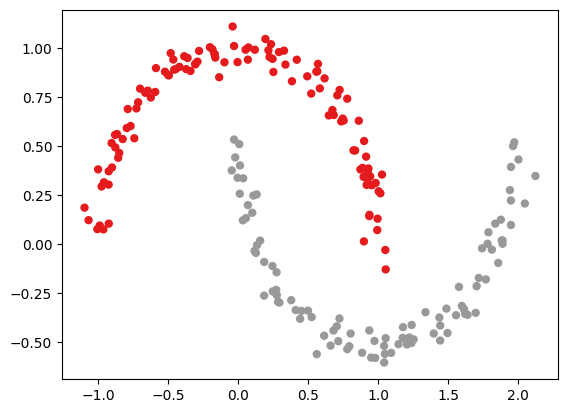

In [19]:
# solving a simple problem with a neural network
np.random.seed(0)
coord, cl = make_moons(n_samples = 300, noise = 0.05)
X, Xt, y, yt = train_test_split(coord, cl, test_size = 0.30, random_state = 0)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = plt.cm.Set1)
plt.show()

In [20]:
# perform training of the neural network
weights = create_architecture(X, 3, 1)
for j in range(30000 + 1 ):

    # first feed forward through the hidden layer
    l1, l2 = feed_forward(X, weights)

    # then, error backpropagation from output to input
    l2_error, l1_delta, l2_delta = backpropagation(l1, l2, weights, y)

    # finally, update the weights of the network
    weights = update_weights(X, l1, l1_delta, l2_delta, weights, alpha = 0.05)

    # from time to time, reporting the results
    if (j % 5000 == 0):
        train_error = np.mean(np.abs(l2_error))
        print('Epoch {:5}'.format(j), end = ' - ')
        print('error: {:0.4f}'.format(train_error), end = ' - ')
        train_accuracy = accuracy(true_label = y, predicted = (l2 > 0.5))
        test_preds = predict(Xt, weights)
        test_accuracy = accuracy(true_label = yt, predicted = test_preds)
        print('acc: train {:0.3f}'.format(train_accuracy), end = ' | ')
        print('test {:0.3f}'.format(test_accuracy))

Epoch     0 - error: 0.5077 - acc: train 0.462 | test 0.656
Epoch  5000 - error: 0.0991 - acc: train 0.952 | test 0.944
Epoch 10000 - error: 0.0872 - acc: train 0.952 | test 0.944
Epoch 15000 - error: 0.0803 - acc: train 0.962 | test 0.956
Epoch 20000 - error: 0.0761 - acc: train 0.967 | test 0.956
Epoch 25000 - error: 0.0736 - acc: train 0.971 | test 0.967
Epoch 30000 - error: 0.0683 - acc: train 0.967 | test 0.944


### Chapter 10. Explaining Convolutional Neural Networks

In [21]:
# building your own LeNet5 network
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.losses import categorical_crossentropy

In [22]:
# collect the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
# convert the target variable to categorical from 0 to 9
num_classes = len(np.unique(y_train))   
print(y_train[0], end = ' => ')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# preparing the training and test data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
img_rows, img_cols = X_train.shape[1:]
X_train = X_train.reshape(len(X_train), img_rows, img_cols, 1)
X_test = X_test.reshape(len(X_test), img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [25]:
# define the arhitecture of the network
lenet = Sequential()
lenet.add(Conv2D(6, kernel_size = (5, 5), activation = 'tanh', input_shape = input_shape, padding = 'same', name  = 'C1'))
lenet.add(AveragePooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
lenet.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid'))
lenet.add(AveragePooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))
lenet.add(Conv2D(120, kernel_size = (5, 5), activation = 'tanh', padding = 'valid', name = 'C5'))
lenet.add(Flatten())
lenet.add(Dense(84, activation = 'tanh', name = 'FC6'))
lenet.add(Dense(num_classes, activation = 'softmax', name = 'OUTPUT'))

# compile the model
lenet.compile(loss = categorical_crossentropy, optimizer = 'SGD', metrics = ['accuracy'])

lenet.summary()

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 27, 27, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 23, 23, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 22, 22, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Conv2D)                     │ (None, 18, 18, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 38880)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC6 (Dense)                     │ (None, 84)             │     3,266,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,317,546 (12.66 MB)

 Trainable params: 3,317,546 (12.66 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# the training of the model
batch_size = 64
epochs = 3
history = lenet.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.8523 - loss: 0.5607 - val_accuracy: 0.9464 - val_loss: 0.1963
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9476 - loss: 0.1884 - val_accuracy: 0.9582 - val_loss: 0.1496
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9595 - loss: 0.1468 - val_accuracy: 0.9632 - val_loss: 0.1277


### Chapter 12. Performing Image Classification

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
import zipfile
from skimage.transform import resize
from skimage.io import imread 

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load the GTSRB dataset into training and test sets, resize the images
IMG_SIZE = 32
TEST_SIZE = 0.2
X, Xt, y, yt = list(), list(), list(), list()
archieve = zipfile.ZipFile("./GTSRB_Final_Training_Images.zip", 'r')
file_paths = [file for file in archieve.namelist() if '.ppm' in file]

for filename in file_paths:
    img = imread(archieve.open(filename))
    img = resize(img, (IMG_SIZE, IMG_SIZE), mode = 'reflect')
    img_label = int(filename.split('/')[-2])

    if (hash(filename) % 1000 / 1000 > TEST_SIZE):
        X.append(img)
        y.append(img_label)
    else:
        Xt.append(img)
        yt.append(img_label)

archieve.close()

In [ ]:
test_ratio = len(Xt) / len(file_paths)
print("Train size: {} test_size: {} ({:0.3f})".format(len(X), len(Xt), test_ratio))

Train size: 31362 test_size: 7847 (0.200)


No classes: 43


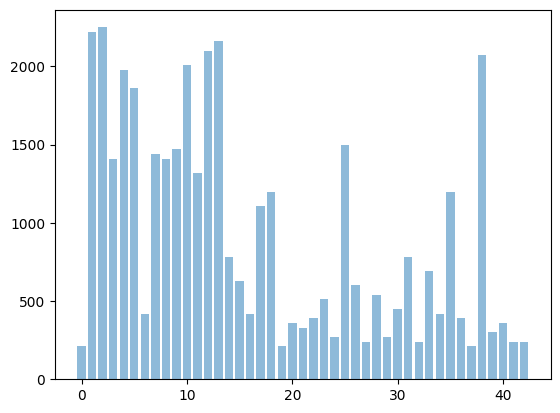

In [ ]:
# distribution of the classes
classes, dist = np.unique(y + yt, return_counts = True)
NUM_CLASSES = len(classes)
print("No classes: {}".format(NUM_CLASSES))

plt.bar(classes, dist, align = 'center', alpha = 0.5)
plt.show()

In [ ]:
# weight classes
class_weight = {c: dist[c] / np.sum(dist) for c in classes}

In [ ]:
# running a classification task
batch_size = 256

# preprocessing the training images with augmentation
tgen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 5,
    width_shift_range = 0.10,
    height_shift_range = 0.10)

train_gen = tgen.flow(np.array(X), to_categorical(y), batch_size = batch_size)

vgen = ImageDataGenerator(rescale = 1/255)

val_gen = vgen.flow(np.array(Xt), to_categorical(yt), batch_size = batch_size)

In [ ]:
# building the neural network
def small_cnn():
    model = Sequential()
    model.add(Conv2D(32, (5,5), padding = 'same', input_shape = (IMG_SIZE, IMG_SIZE, 3), activation = 'relu'))
    model.add(Conv2D(64, (5, 5), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(768, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(NUM_CLASSES, activation = 'softmax'))
    return model

model = small_cnn()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [ ]:
# train the model
history = model.fit(
    train_gen,
    steps_per_epoch = len(X) // batch_size,
    validation_data = val_gen,
    validation_steps = len(Xt) // batch_size,
    class_weight = class_weight,
    epochs = 30,
    verbose = 2
)

Epoch 1/30
122/122 - 88s - 718ms/step - accuracy: 0.5660 - loss: 0.0407 - val_accuracy: 0.7350 - val_loss: 0.8484
Epoch 2/30
122/122 - 6s - 52ms/step - accuracy: 0.5385 - loss: 0.0365 - val_accuracy: 0.7365 - val_loss: 0.8484
Epoch 3/30
122/122 - 90s - 737ms/step - accuracy: 0.6050 - loss: 0.0365 - val_accuracy: 0.7763 - val_loss: 0.7296
Epoch 4/30
122/122 - 7s - 54ms/step - accuracy: 0.6055 - loss: 0.0348 - val_accuracy: 0.7781 - val_loss: 0.7307
Epoch 5/30
122/122 - 96s - 783ms/step - accuracy: 0.6368 - loss: 0.0334 - val_accuracy: 0.7999 - val_loss: 0.6440
Epoch 6/30
122/122 - 7s - 56ms/step - accuracy: 0.6562 - loss: 0.0307 - val_accuracy: 0.7969 - val_loss: 0.6455
Epoch 7/30
122/122 - 98s - 802ms/step - accuracy: 0.6643 - loss: 0.0301 - val_accuracy: 0.8332 - val_loss: 0.5613
Epoch 8/30
122/122 - 7s - 56ms/step - accuracy: 0.6562 - loss: 0.0297 - val_accuracy: 0.8352 - val_loss: 0.5632
Epoch 9/30
122/122 - 108s - 888ms/step - accuracy: 0.6872 - loss: 0.0280 - val_accuracy: 0.8310 

Best validation accuracy: 0.929


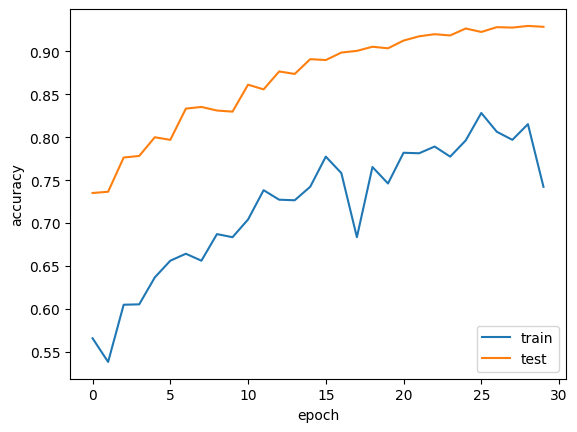

In [ ]:
# plotting the training and validation accuracy
print("Best validation accuracy: {:0.3f}".format(np.max(history.history['val_accuracy'])))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

### Chapter 14. Working on Language Processing

In [1]:
# defining understanding as tokenization
import numpy as np 
texts = ['My dog gets along with cats',
         'That cat is vicious',
         'My dog is happy when it is lunch']

In [2]:
# putting all the documents into a bag
unique_words = set(word.lower() for phrase in texts for word in phrase.split(" "))
print(f"There are {len(unique_words)} unique words")

There are 14 unique words


In [3]:
# preprocess the texts
from tensorflow.keras.preprocessing.text import Tokenizer
vocabulary_size = len(unique_words) + 1 
tokenizer = Tokenizer(num_words = vocabulary_size)
tokenizer.fit_on_texts(texts)
print(tokenizer.index_word)

{1: 'is', 2: 'my', 3: 'dog', 4: 'gets', 5: 'along', 6: 'with', 7: 'cats', 8: 'that', 9: 'cat', 10: 'vicious', 11: 'happy', 12: 'when', 13: 'it', 14: 'lunch'}


In [4]:
# word frequency vectorization
print(tokenizer.texts_to_matrix(texts))

[[0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]]


In [5]:
# TF-IDF vectorization
print(np.round(tokenizer.texts_to_matrix(texts, mode = 'tfidf'), 1))

[[0.  0.  0.7 0.7 0.9 0.9 0.9 0.9 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.7 0.  0.  0.  0.  0.  0.  0.9 0.9 0.9 0.  0.  0.  0. ]
 [0.  1.2 0.7 0.7 0.  0.  0.  0.  0.  0.  0.  0.9 0.9 0.9 0.9]]


In [6]:
# sequence vectorization
print(tokenizer.texts_to_sequences(texts))

[[2, 3, 4, 5, 6, 7], [8, 9, 1, 10], [2, 3, 1, 11, 12, 13, 1, 14]]


In [12]:
# using AI for Sentiment Analysis | IMDB dataset
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = top_words, seed = 42)
print(f"Training examples: %i" % len (x_train))
print(f"Test examples: %i" % len (x_test))

Training examples: 25000
Test examples: 25000


In [13]:
# check imbalance in the dataset
import numpy as np 
print(np.unique(y_train, return_counts = True))

(array([0, 1]), array([12500, 12500]))


In [15]:
# convert them in dictionary
word_to_id = {w: i + 3 for w, i in imdb.get_word_index().items()}
id_to_word = {0: '<PAD>', 1: '<START>', 2: '<UNK>'}
id_to_word.update({i + 3: w for w, i in imdb.get_word_index().items()})

def convert_to_text(sequence):
    return ' '.join([id_to_word[s] for s in sequence if s >= 3])

print(convert_to_text(x_train[8]))

i'm 14 years old and i love this cartoon burt reynolds and dom make a great pair this movie is really funny and i love the songs my favorite songs are you can't keep a good dog down and that song about sharing i think it's called what's mine is yours this was the last movie with who played the voice of anne marie my favorite character is charlie but i find voice is so fun to hear although some scenes i actually found scary i still have a hard time watching the scene with charlie's dream and carface scares the crap out of me other characters like king i found really funny the ending was adorable and was actually sad made me cry a little i give this movie 7 10


In [16]:
# take the first 200 words from the review
from keras.preprocessing.sequence import pad_sequences
max_pad = 200
x_train = pad_sequences(X_train, maxlen = max_pad)
x_test = pad_sequences(X_test, maxlen = max_pad)
print(x_train[0])

[ 299    4  172  243    7  217   11    4    2 7106   22    4    2 1038
   13   70  243    7 3468   19 9533   11   15  236 1313  136  121   29
    5 5612   26  112 4382  180   34 3304 1768    5  320    4  162 5097
  568  319    4 3324 5235 1456  269    8  401   56   19 5612   16  142
  334   88  146  243    7   11    2 2756  150   11    4    2 2550   10
   10 7173  828    4  206  170   33    6   52 4968  225   55  117  180
   58   11   14   22   48   50   16  101  329   12   62   30   35 6637
 1532   22 4079   11    4 1986 1199   35  735   18  118  204  881   15
  291   10   10 7173   82   93   52  361    7    4  162 5097    2    5
    4  785 6542   49    7    4  172 2572    7  665   26  303  343   11
   23    4    2   11  192 4079   11    4 1986    9   44   84   24    2
   54   36   66  144   11   68  205  118  602   55  729  174    8   23
    4    2   10   10 4079   11    4 1986  127  316 2606   37   16 3445
   19   12  150  138  426    2 7173   79   49  542  162 5097 4413   84
   11 

In [21]:
# designing the arhitecture of the model RNN
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout, GlobalMaxPool1D, Embedding

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_pad))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.build(input_shape=(None, max_pad))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 200, 128)       │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371,745 (1.42 MB)

 Trainable params: 371,745 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
# training the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3, batch_size = 256)

Epoch 1/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.5771 - loss: 0.6779 - val_accuracy: 0.7493 - val_loss: 0.5245
Epoch 2/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 357ms/step - accuracy: 0.7895 - loss: 0.4778 - val_accuracy: 0.8301 - val_loss: 0.4411
Epoch 3/3
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 346ms/step - accuracy: 0.8675 - loss: 0.3372 - val_accuracy: 0.8613 - val_loss: 0.3199


In [24]:
loss, metric = model.evaluate(x_test, y_test, verbose = 0)
print(f"Test accuracy: %0.3f" % metric)

Test accuracy: 0.861


### Chapter 16. Building Generative Adversarial Networks

In [11]:
# importing the neccessary functions and classes
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# normalizing the data
def normalize(X):
    X = X.reshape(len(X), 784)
    X = X.astype('float32') / 255
    return X
(X_train, X_test), (y_train, y_test) = mnist.load_data()
X_train = normalize(X_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# preparing the GAN architecture 

# 1. the generator / forger
input_dim = 100
np.random.seed(42)
optimizer = Adam(learning_rate =  0.0002, beta_1 = 0.5)

gen = Sequential()
gen.add(Dense(256, input_dim = input_dim))
gen.add(LeakyReLU(alpha = 0.2))
gen.add(BatchNormalization())
gen.add(Dense(512))
gen.add(LeakyReLU(alpha = 0.2))
gen.add(BatchNormalization())
gen.add(Dense(1024))
gen.add(LeakyReLU(alpha = 0.2))
gen.add(BatchNormalization())
gen.add(Dense(784, activation = 'sigmoid'))

2025-07-24 23:33:41.682514: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/marius/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/marius/.local/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# 2. the discriminator / judge
dsc = Sequential()
dsc.add(Dense(1024, input_dim = 784))
dsc.add(LeakyReLU(alpha = 0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(512))
dsc.add(LeakyReLU(alpha = 0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(256))
dsc.add(LeakyReLU(alpha = 0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(1, activation = 'sigmoid'))

/home/marius/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/marius/.local/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# control the network optimization
def make_trainable(dnn, flag):
    dnn.trainable = flag
    for l in dnn.layers:
        l.trainable = flag
    
make_trainable(dsc, False)
inputs = Input(shape = (input_dim,))
hidden = gen(inputs)
output = dsc(hidden)
gan = Model(inputs, output)

In [8]:
# prepare 2 handy functions for generating the input noise and plotting the results
def create_noise(n, z):
    return np.random.normal(0, 1, size = (n, z))

def plot_sample(n, z):
    samples = gen.predict(create_noise(n, z))
    plt.figure(figsize = (15, 3))
    for i in range(n):
        plt.subplot(1, n, (i + 1))
        plt.imshow(samples[i].reshape(28, 28), cmap = 'gray_r')
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Epoch 0 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


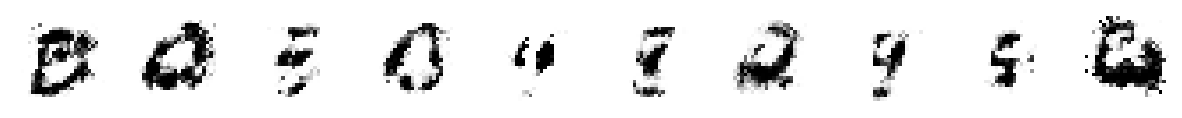

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [18]:
# training the GAN
epochs = 5
batch_size = 32
batch_no = 16
gen_errors, dsc_errors = (list(), list())

optimizer_gen = Adam(learning_rate = 0.0002, beta_1 = 0.5)
optimizer_dsc = Adam(learning_rate = 0.0002, beta_1 = 0.5)

gen.compile(loss = 'binary_crossentropy', optimizer = optimizer_gen)
dsc.compile(loss = 'binary_crossentropy', optimizer = optimizer_dsc)
gan.compile(loss = 'binary_crossentropy', optimizer = optimizer_gen)

for i in range(0, epochs):
    for j in range(batch_no):

        # Drawing a random sample of the training set
        rand_sample = np.random.randint(0, len(X_train), size = batch_size)
        image_batch = X_train[rand_sample]

        # Creating noisy input for the generator
        input_noise = create_noise(batch_size, input_dim)

        # Generating fake images
        generated_images = gen.predict(input_noise)
        X = np.concatenate((image_batch, generated_images))

        # Creating somehow noisy labels
        y = np.concatenate([[0.9] * batch_size, [0.0] * batch_size])

        # Training the discriminator to distinguish fakes from real ones
        make_trainable(dsc, True)
        dsc_loss = dsc.train_on_batch(X, y)
        make_trainable(dsc, False)

        # Training generating fakes
        input_noise = create_noise(batch_size, input_dim)
        fakes = np.ones(batch_size)
        for _ in range(4):
            gan_loss = gan.train_on_batch(input_noise, fakes)

    # Recording the losses
    gen_errors.append(gan_loss)
    dsc_errors.append(dsc_loss)

    # Showing the results
    if i % 10 == 0:
        print("Epoch %i " % i)
        plot_sample(10, input_dim)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/home/marius/.local/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


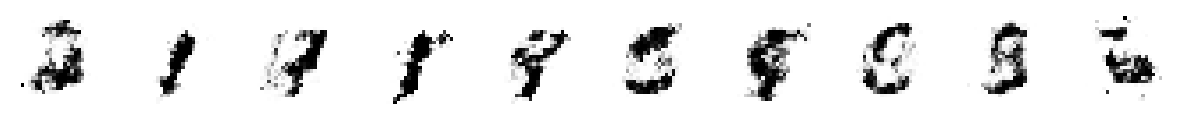

In [19]:
# Plotting the final result
plot_sample(10, input_dim)

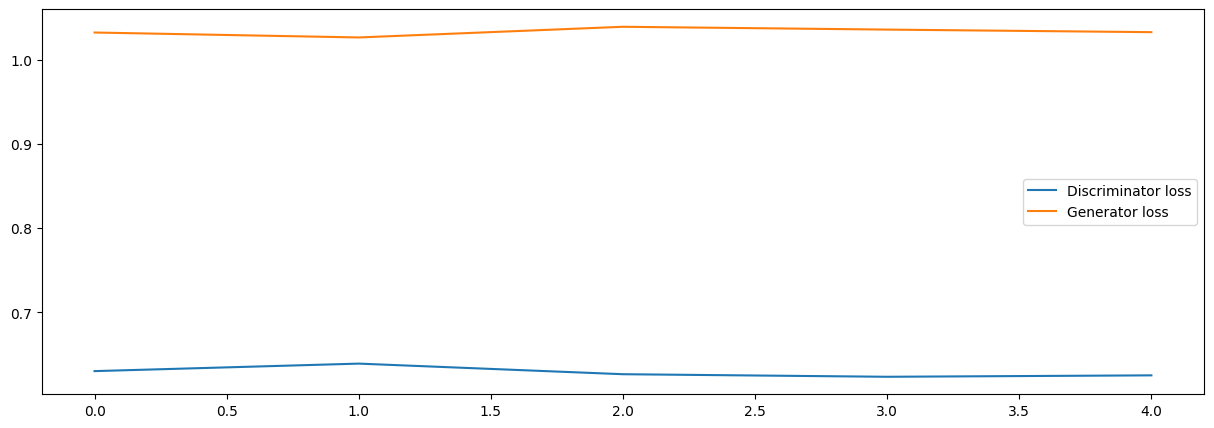

In [21]:
# Plotting the errors
plt.figure(figsize = (15, 5))
plt.plot(dsc_errors, label = 'Discriminator loss')
plt.plot(gen_errors, label = 'Generator loss')
plt.legend()
plt.show()

### Chapter 17. Playing with Deep Reinforcement Learning

In [7]:
# creating the cart environment and test some random commands
import gym
import numpy as np
env = gym.make('CartPole-v0')
np.random.seed(42)
nb_actions = env.action_space.n
input_shape = (1, env.observation_space.shape[0])

/home/marius/.local/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [11]:
# reset the environment and perform a random action
observation = env.reset(seed=42)
for t in range(200):
    env.render()
    act = env.action_space.sample()  # take a random action
    obs, rwrd, terminated, truncated, info = env.step(act)
    done = terminated or truncated
    if done:
        print("Episode concluded after %i timesteps" % (t + 1))
        break
env.close()

Episode concluded after 12 timesteps
